## Advanced Housing Prices- Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [97]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Calculating missing % for categorical features

In [10]:
cat_missing_cols = []
for feature in df.columns:
    if(df[feature].isnull().sum()>1 and df[feature].dtypes == "O"):
        cat_missing_cols.append(feature)
        print(feature,"has ",df[feature].isnull().mean()*100,"% missing values")
print(cat_missing_cols)

Alley has  93.76712328767123 % missing values
MasVnrType has  0.547945205479452 % missing values
BsmtQual has  2.5342465753424657 % missing values
BsmtCond has  2.5342465753424657 % missing values
BsmtExposure has  2.6027397260273974 % missing values
BsmtFinType1 has  2.5342465753424657 % missing values
BsmtFinType2 has  2.6027397260273974 % missing values
FireplaceQu has  47.26027397260274 % missing values
GarageType has  5.5479452054794525 % missing values
GarageFinish has  5.5479452054794525 % missing values
GarageQual has  5.5479452054794525 % missing values
GarageCond has  5.5479452054794525 % missing values
PoolQC has  99.52054794520548 % missing values
Fence has  80.75342465753424 % missing values
MiscFeature has  96.30136986301369 % missing values
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


### Handling missing data in categorical features

In [12]:
for feature in cat_missing_cols:
    df[feature].fillna('missing',inplace = True)
df[cat_missing_cols].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,missing,missing,missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,missing,missing,missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,missing,missing,missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,missing,missing,missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,missing,missing,missing,0,12,2008,WD,Normal,250000


### Calculating missing % for numerical features

In [14]:
num_missing_cols = [column for column in df.columns if df[column].isnull().sum()>1 and df[column].dtypes != 'O']
num_missing_cols

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
for feature in num_missing_cols:
    print("{} has {} % missing values".format(feature,np.round(df[feature].isnull().mean()*100,4) ))

LotFrontage has 17.7397 % missing values
MasVnrArea has 0.5479 % missing values
GarageYrBlt has 5.5479 % missing values


### Handling missing data for categorical features

In [19]:
for feature in num_missing_cols:
    df[feature].fillna(df[feature].median(),inplace=True)
df[num_missing_cols].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

### Handling Time series or temporal data

In [20]:
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    df[feature] = df['YrSold'] - df[feature]

In [25]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


### Transformation of numerical skewed data to Guassian distribution

In [34]:
num_features = [column for column in df.columns if df[column].dtypes != "O" and column not in ['Id']+['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']]
num_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [38]:
descrete_features = [column for column in num_features if df[column].nunique()<25]
print(len(descrete_features))

17


In [41]:
cont_features = [column for column in num_features if column not in descrete_features]
len(cont_features)

16

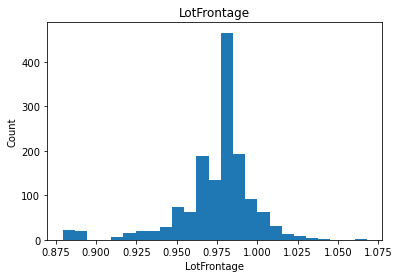

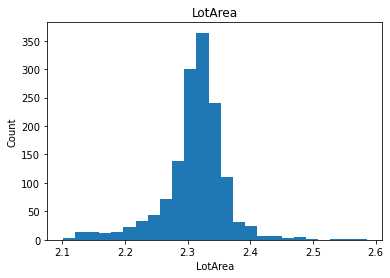

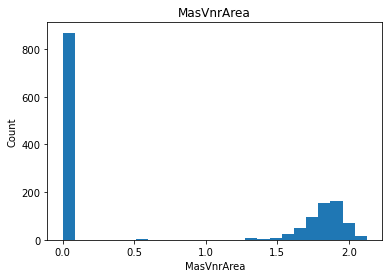

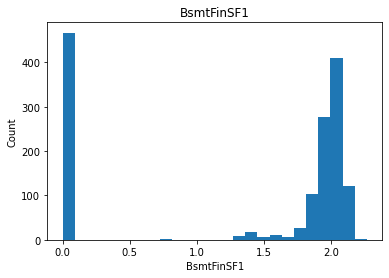

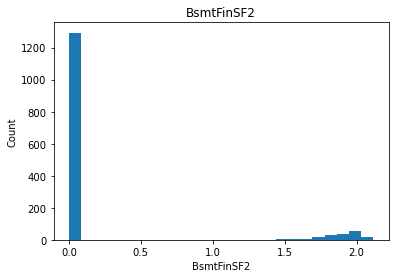

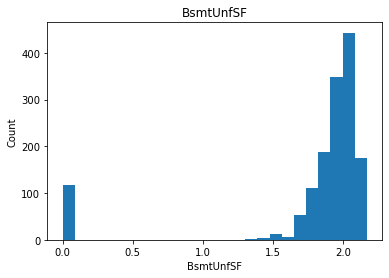

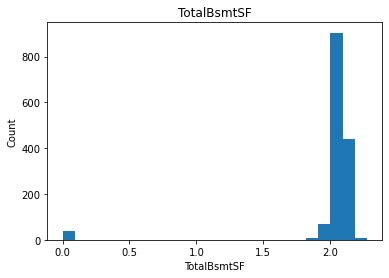

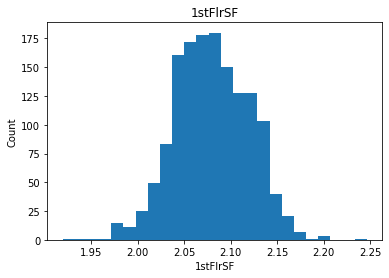

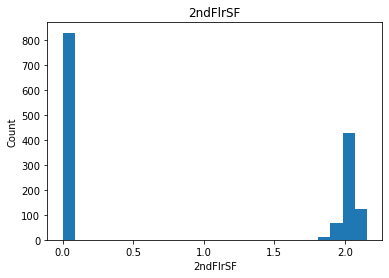

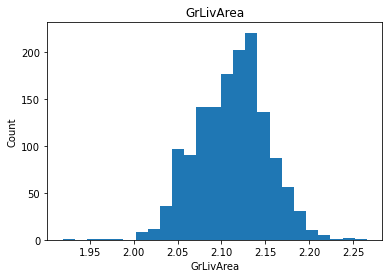

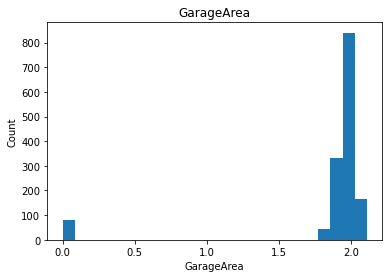

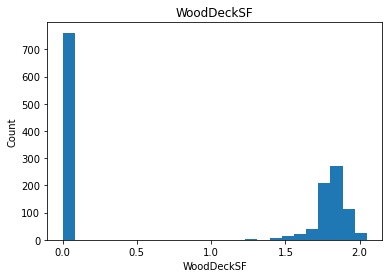

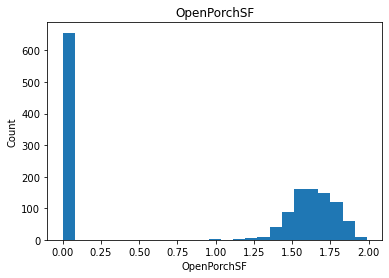

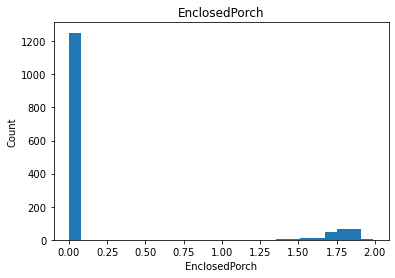

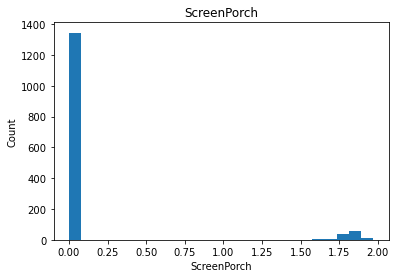

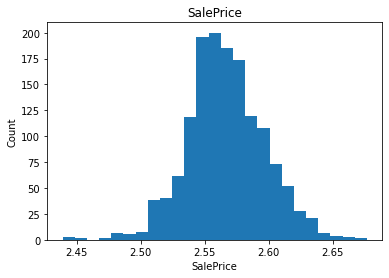

In [44]:
for feature in cont_features:
    df[feature] = np.log1p(df[feature])
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [46]:
df[cont_features].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,0.973301,2.306780,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,2.133555,1.988983,0.000000,1.634547,0.000000,0.0,2.583824
1,0.987819,2.319405,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,2.096943,1.964788,1.902174,0.000000,0.000000,0.0,2.573300
2,0.976519,2.334879,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,2.138688,2.003076,0.000000,1.560500,0.000000,0.0,2.589054
3,0.967505,2.318892,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,2.134038,2.010379,0.000000,1.522467,1.888504,0.0,2.553297
4,0.991126,2.357574,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,2.162835,2.045086,1.834610,1.694266,0.000000,0.0,2.597433


### Handling Categorical Data

In [49]:
cat_features = [column for column in df.columns if df[column].dtypes == 'O']
cat_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [66]:
for feature in cat_features:
    temp=df[feature].value_counts()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [68]:
df.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0.973301,2.306780,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.837880,Gd,TA,PConc,Gd,TA,No,GLQ,2.023008,Unf,0.000000,1.794635,2.048136,GasA,Ex,Y,SBrkr,2.048136,2.047835,0,2.133555,1,0,2,1,3,1,Gd,8,Typ,0,missing,Attchd,5.0,RFn,2,1.988983,TA,TA,Y,0.000000,1.634547,0.000000,0,0.000000,0,missing,missing,missing,0,2,2008,WD,Normal,2.583824
1,2,20,RL,0.987819,2.319405,Pave,missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,2.065156,Unf,0.000000,1.894991,2.096943,GasA,Ex,Y,SBrkr,2.096943,0.000000,0,2.096943,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,1.964788,TA,TA,Y,1.902174,0.000000,0.000000,0,0.000000,0,missing,missing,missing,0,5,2007,WD,Normal,2.573300
2,3,60,RL,0.976519,2.334879,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.807264,Gd,TA,PConc,Gd,TA,Mn,GLQ,1.972450,Unf,0.000000,1.956616,2.057383,GasA,Ex,Y,SBrkr,2.057383,2.049631,0,2.138688,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,2.003076,TA,TA,Y,0.000000,1.560500,0.000000,0,0.000000,0,missing,missing,missing,0,9,2008,WD,Normal,2.589054
3,4,70,RL,0.967505,2.318892,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,1.853152,Unf,0.000000,1.986972,2.032004,GasA,Gd,Y,SBrkr,2.062933,2.032004,0,2.134038,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,2.010379,TA,TA,Y,0.000000,1.522467,1.888504,0,0.000000,0,missing,missing,missing,0,2,2006,WD,Abnorml,2.553297
4,5,60,RL,0.991126,2.357574,Pave,missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.925822,Gd,TA,PConc,Gd,TA,Av,GLQ,2.013056,Unf,0.000000,1.973587,2.084931,GasA,Ex,Y,SBrkr,2.084931,2.074473,0,2.162835,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,2.045086,TA,TA,Y,1.834610,1.694266,0.000000,0,0.000000,0,missing,missing,missing,0,12,2008,WD,Normal,2.597433
5,6,50,RL,0.991922,2.356606,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Rare_var,Gd,TA,No,GLQ,2.027773,Unf,0.000000,1.643721,2.038731,GasA,Ex,Y,SBrkr,2.038731,1.993388,0,2.106259,1,0,1,1,1,1,TA,5,Typ,0,missing,Attchd,16.0,Unf,2,1.970724,TA,TA,Y,1.550446,1.489299,0.000000,320,0.000000,0,missing,MnPrv,Shed,700,10,2009,WD,Normal,2.554946
6,7,20,RL,0.983384,2.324230,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,1.829554,Gd,TA,PConc,Ex,TA,Av,GLQ,2.106882,Unf,0.000000,1.911326,2.131881,GasA,Ex,Y,SBrkr,2.132442,0.000000,0,2.132442,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,2.009122,TA,TA,Y,1.878729,1.621454,0.000000,0,0.000000,0,missing,missing,missing,0,8,2007,WD,Normal,2.612611
7,8,60,RL,0.977552,2.327075,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,1.869461,TA,TA,CBlock,Gd,TA,Mn,ALQ,2.048587,BLQ,1.503301,1.853152,2.080730,GasA,Ex,Y,SBrkr,2.0

### Feature Scaling

In [74]:
scaling_features = [column for column in df.columns if column not in ['Id','SalePrice'] and df[column].dtypes != 'O']
len(scaling_features)

36

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[scaling_features])

MinMaxScaler()

In [99]:
scaler.transform(df[scaling_features])

array([[0.23529412, 0.15068493, 0.0334198 , ..., 0.        , 0.09090909,
        0.5       ],
       [0.        , 0.20205479, 0.03879502, ..., 0.        , 0.36363636,
        0.25      ],
       [0.23529412, 0.1609589 , 0.04650728, ..., 0.        , 0.72727273,
        0.5       ],
       ...,
       [0.29411765, 0.15410959, 0.03618687, ..., 0.16129032, 0.36363636,
        1.        ],
       [0.        , 0.1609589 , 0.03934189, ..., 0.        , 0.27272727,
        1.        ],
       [0.        , 0.18493151, 0.04037019, ..., 0.        , 0.45454545,
        0.5       ]])

In [100]:
df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[scaling_features]), columns=scaling_features)],
                    axis=1)

In [101]:
df.head()

,Id,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,208500,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,2,181500,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,3,223500,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,4,140000,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,5,250000,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


In [105]:
df.drop(['Id'],axis=1)

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.122500,0.125089,0.000000,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.936364,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.00000,0.090909,0.50
1,181500,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.000000,0.173281,0.000000,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.690909,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.363636,0.25
2,223500,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.101250,0.086109,0.000000,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.918182,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.00000,0.727273,0.50
3,140000,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.000000,0.038271,0.000000,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.890909,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.00000,0.090909,0.00
4,250000,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.218750,0.116052,0.000000,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.909091,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.00000,1.000000,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0.235294,0.140411,0.030929,0.555556,0.500,0.920290,0.833333,0.000000,0.000000,0.000000,0.407962,0.155974,0.142038,0.336077,0.0,0.247362,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.416667,0.333333,0.900000,0.50,0.324401,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.00000,0.636364,0.25
1456,210000,0.000000,0.219178,0.055505,0.555556,0.625,0.768116,0.633333,0.074375,0.139972,0.110583,0.252140,0.252373,0.399036,0.000000,0.0,0.327619,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.416667,0.666667,0.709091,0.50,0.352609,0.407235,0.000000,0.000000,0.0,0.0,0.0,0.00000,0.090909,1.00
1457,266500,0.294118,0.154110,0.036187,0.666667,1.000,0.500000,0.933333,0.000000,0.048724,0.000000,0.375428,0.188543,0.195961,0.557869,0.0,0.377920,0.000000,0.0,0.666667,0.0,0.500,0.333333,0.583333,0.666667,0.372727,0.25,0.177715,0.000000,0.109689,0.000000,0.0,0.0,0.0,0.16129,0.363636,1.00
1458,142125,0.000000,0.160959,0.039342,0.444444,0.625,0.565217,0.766667,0.000000,0.008682,0.698100,0.000000,0.176432,0.170721,0.000000,0.0,0.140166,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.250000,0.000000,0.454545,0.25,0.169252,0.427071,0.000000,0.202899,0.0,0.0,0.0,0.00000,0.272727,1.00
